# Credit Card Fraud Detection Algorithm  - Ultimate Comparison Model
This notebook will introduce Machine Learning & data science concepts by exploring Credit Card Fraud Detection. I tried to create this machine learning model as much possible end to end & descriptive.

This is example of <b>Single-Class Classification</b>, where it involves to decide whether a sample is part of one class or another.

This is 5 steps of Machine Learning modelling framework -   

[STEP-1: Identify the Problem](#section_id1)   

[STEP-2: Discover the Data](#section_id2)

[STEP-3: Model Development](#section_id3)

[STEP-4: Other Experiments](#section_id4)

[STEP-5: Conclusion](#section_id5)

# STEP-1: Identify the Problem <a name="section_id1"></a>

In our case, here I will exploring Binary Classification . This is because, we are going to be using a number of different features about a transaction to predict whether they have fraudulent or not.


# STEP-2: Discover the Data<a name="section_id2"></a>

Here I am using the data from Kaggle

Data Source References https://www.kaggle.com/mlg-ulb/creditcardfraud

Attributes and features also referred to as independent variables and target variable can be referred to as a dependent variable. I use the independent variables to predict our dependent variable.

About the file: creditcard.csv It Consist of 31 columns

Features are different parts of the data. During this steps, will findout what I can do with different attributes of data.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Acknowledgements: The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project.

### 1. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

sns.set(style='darkgrid')


### 2. Load Data

In [2]:
#Loading Test Dataset

import pandas as pd
df = pd.read_csv("creditcard.csv")
df.shape # (rows, columns)

(284807, 31)

### 3. Understand the Data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Exploring Dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 4. Check the quality of the data

In [6]:
# Checking dataset contain any Null value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing data in the dataset.

In [7]:
# Checking dataset contain any duplicate value
df.duplicated().sum()

1081

We have 1081 duplicated entries and we will need to remove them.

#### Remove Duplicated Data

In [8]:
# Drop duplicates
df = df.drop_duplicates()

In [9]:
# Check to see if we still have duplicates
df.duplicated().sum()

0

In [10]:
# Let's find out how many of each class there

df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Text(0, 0.5, 'Number of Features')

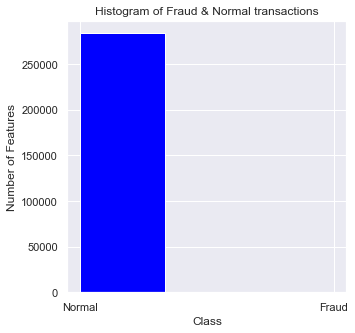

In [11]:
# Creating Histogram to check the number of fradulent and non-fraudlent transactions after balanced the data

LABELS = ['Normal','Fraud']

plt.figure(figsize = (5,5))
plt.hist(df['Class'],bins=3,color="blue")
plt.title('Histogram of Fraud & Normal transactions')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Number of Features')

We have way more normal transactions than fraudulent ransactons. When one set of classes dominate over another set of classes, it causes the machine learning model to be more biased towards majority class which results in poor classification of minority classes.

Now, there are various approaches to deal with this problem. For example:

**Undersampling methods**

**Oversampling methods**

**Synthetic data generation**

We will use undersampling method in this project.

### 5. Downsampling the Data

In [12]:
# Creating two group classes 0 and 1 into different variables 

new_df_zero = df.groupby(['Class']).get_group(0)
new_df_one = df.groupby(['Class']).get_group(1)

In [13]:
# Taking the sample size of 1000 from zero - as data is highly unbalanced
new_one = new_df_zero.sample(n=1000)

In [14]:
# Combined the make new dataframe
result = pd.concat([new_df_one,new_one], axis=0)

In [15]:
# Total number of fraud and normal transactions 
print ("Total Fraudulent Transactions: ",len(result[result['Class']==1]))
print ("Total Non-Fraudulent Transactions: ",len(result[result['Class']==0]))
print("Diemsions of the Dataset: ",result.shape)
print("List of Features are: ",result.columns)

Total Fraudulent Transactions:  473
Total Non-Fraudulent Transactions:  1000
Diemsions of the Dataset:  (1473, 31)
List of Features are:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Text(0, 0.5, 'Number of Features')

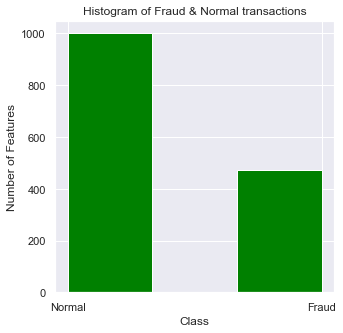

In [16]:
# Creating Histogram to check the number of fradulent and non-fraudlent transactions after balanced the data

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
LABELS = ['Normal','Fraud']

plt.figure(figsize = (5,5))
plt.hist(result['Class'],bins=3,color="green")
plt.title('Histogram of Fraud & Normal transactions')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Number of Features')

After we have downsampling the dataset, the normal transactions are roughly twice as many as fraudulent ones.

### 6. Exploratory Data Analsis

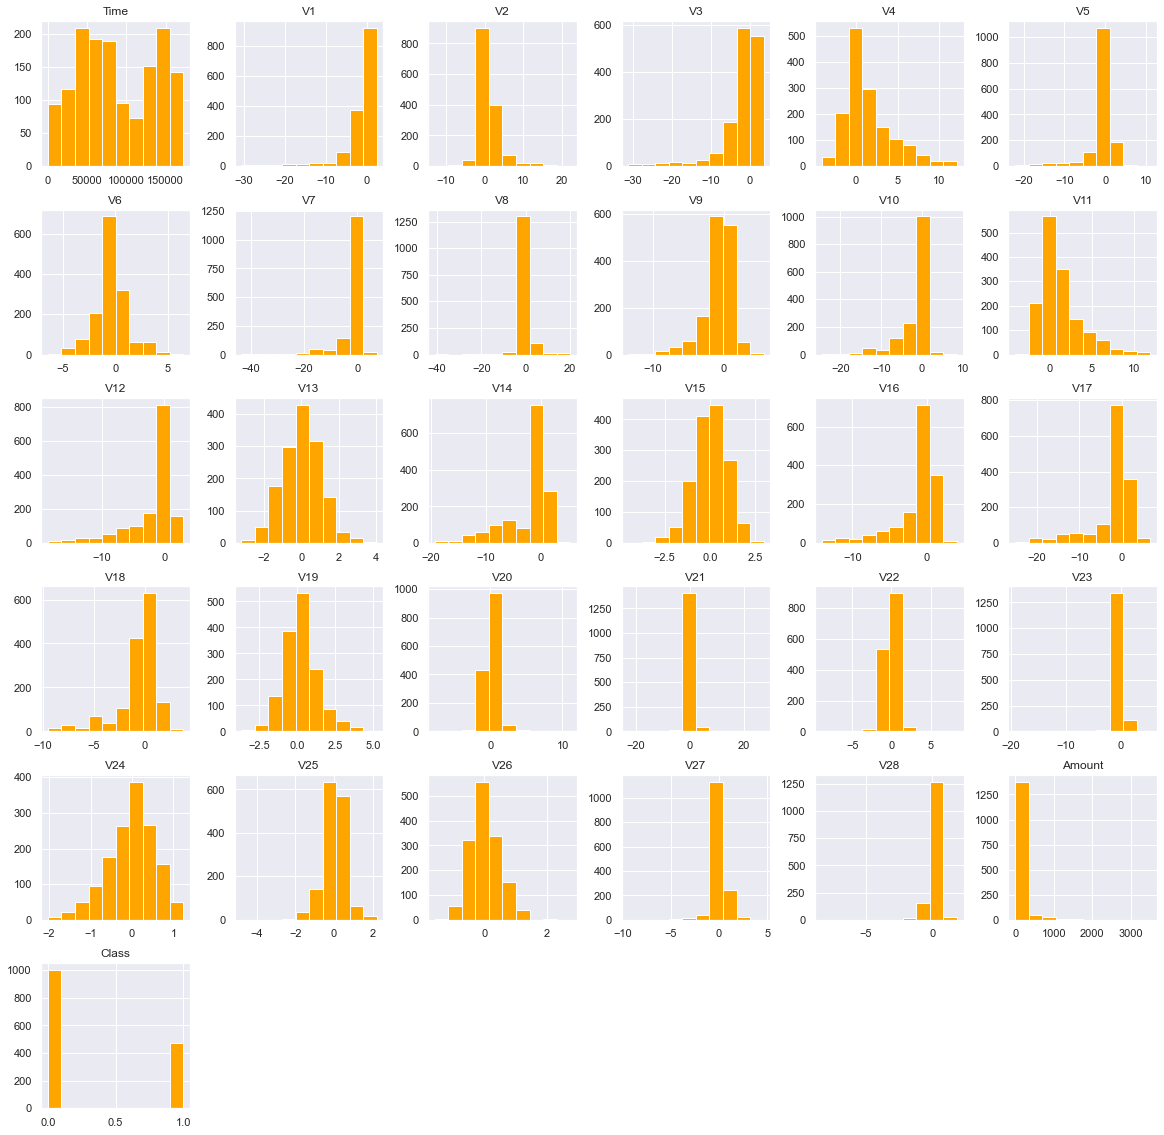

In [17]:
#Couple of histogram plotted for better visualization 
 
result.hist(figsize = (20,20), color='orange')
plt.show()

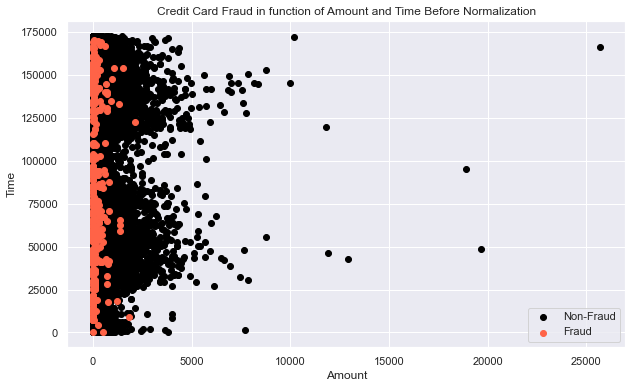

In [18]:
# Create Scatterplot  figure with Balanced Dataset
plt.figure(figsize=(10, 6))

# Scatter with negative examples
plt.scatter(df.Amount[df.Class==0],
            df.Time[df.Class==0],
            color="black")

# Scatter with postivie examples
plt.scatter(df.Amount[df.Class==1],
            df.Time[df.Class==1],
            color="tomato")


# Add some helpful info
plt.title("Credit Card Fraud in function of Amount and Time Before Normalization")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.legend(["Non-Fraud","Fraud"]);



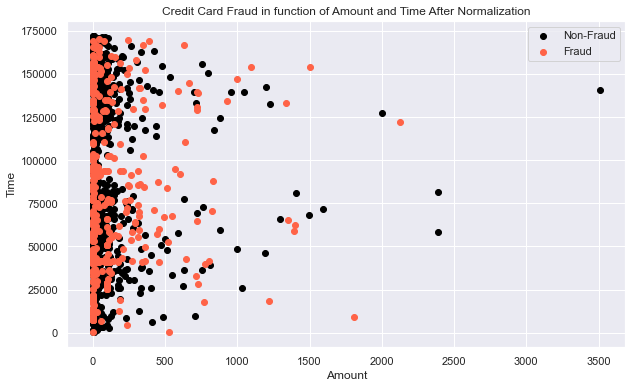

In [19]:
# Create Scatterplot  figure with Balanced Dataset
plt.figure(figsize=(10, 6))

# Scatter with negative examples
plt.scatter(result.Amount[result.Class==0],
            result.Time[result.Class==0],
            color="black")

# Scatter with postivie examples
plt.scatter(result.Amount[result.Class==1],
            result.Time[result.Class==1],
            color="tomato")


# Add some helpful info
plt.title("Credit Card Fraud in function of Amount and Time After Normalization")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.legend(["Non-Fraud","Fraud"]);

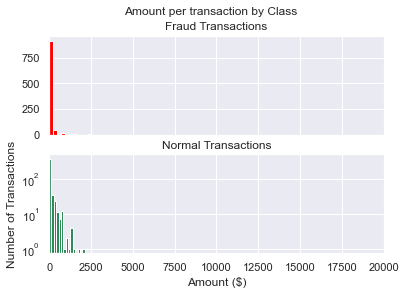

In [20]:
f, (ax1,ax2) = plt.subplots (2,1,sharex=True)
f.suptitle('Amount per transaction by Class')
bins = 15
ax1.hist(result.Amount[result.Class==0], bins = bins,color = 'red')
ax1.set_title('Fraud Transactions')
ax2.hist(result.Amount[result.Class==1], bins = bins,color = 'seagreen')
ax2.set_title('Normal Transactions')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

In [21]:
# Analysis with Fraud amount

result.Amount[result.Class==1].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [22]:
# Analysis with Normal amount

result.Amount[result.Class==0].describe()

count    1000.000000
mean       87.720460
std       235.662485
min         0.000000
25%         5.677500
50%        21.125000
75%        72.590000
max      3510.950000
Name: Amount, dtype: float64

<AxesSubplot:>

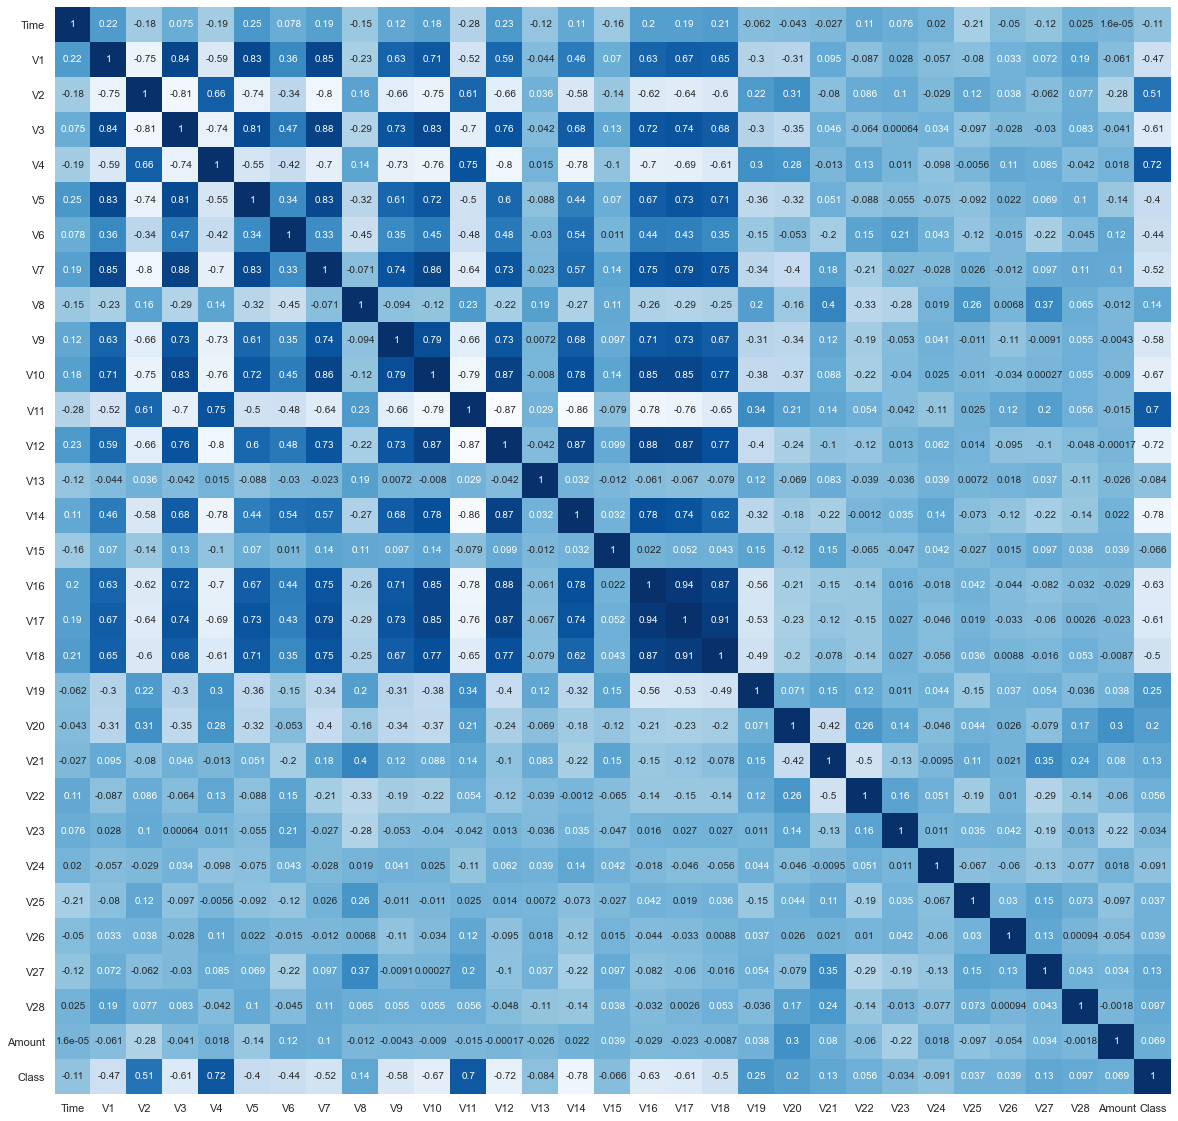

In [23]:
# Let's make our correlation matrix a little prettier

corrmat = result.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plot heat map
sns.heatmap(result[top_corr_features].corr(),
            annot = True, cmap = 'Blues',
            cbar=False)

In [24]:
# sort the correlation matrix by the absolute values
corrmat['Class'].abs().sort_values(ascending=False)[:11]

Class    1.000000
V14      0.784763
V12      0.720837
V4       0.715472
V11      0.702741
V10      0.673458
V16      0.634736
V17      0.607691
V3       0.607627
V9       0.578523
V7       0.518449
Name: Class, dtype: float64

#### After we get the absolute values, the following variables have the highest correlation with our tartget variable "Class":
V14, V12, V4, V11, V10, V16, V3, V17, V9, and V7

## Principal Component Analysis(PCA)

In [25]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

#use Scikit Learn to do PCA on Dataset
creditcard = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

x = df.loc[:,creditcard].values

#Create a regular PCA model
pca_all = PCA()

#Fit and transform data to the model with 28 Categoris
reduced_data_pca = pca_all.fit_transform(x)

### Inspect the shape

In [26]:
reduced_data_pca.shape

(283726, 28)

In [27]:
pca_all.explained_variance_ratio_

array([0.1245754 , 0.08900086, 0.07472676, 0.06563739, 0.06221947,
       0.05821901, 0.04947536, 0.0456193 , 0.03954042, 0.03784089,
       0.03408964, 0.03252103, 0.03248077, 0.02973916, 0.02746708,
       0.02506752, 0.02329062, 0.02291428, 0.021709  , 0.01945828,
       0.01737443, 0.01702831, 0.01276231, 0.01203642, 0.00891523,
       0.00762574, 0.00513745, 0.00352787])

<BarContainer object of 28 artists>

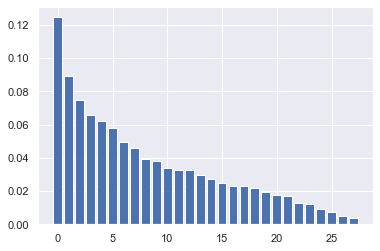

In [28]:
plt.bar(np.arange(28),pca_all.explained_variance_ratio_)

In [29]:
variance = 0
for i, v in enumerate(pca_all.explained_variance_ratio_):
    variance += v
    if variance > 0.95:
        break
print('The number of dimensions needed:', i+1)

The number of dimensions needed: 23


# STEP-3: Model Development<a name="section_id3"></a>

We will use the following models in the model development process:

1.Logistic Regression Model    
2.Deep Learning Neural Network   
3.Decision Tree Model   
4.Random Forest Model   
5.K-Nearest Neighbor   
6.Gradient Boosting Model   

The chosen performance metric: **Recall**

Recall is defined as the number of True Positives (TP) divided by the number of Actual Positives (TP + FN). 

"Typically, we’d want to train a model that maximizes recall score when opportunity costs are high, or when we want to be sure that our model finds as many actual positive cases as possible, even if it’s wrong sometimes. This is so far the best metric to use in our fraud detection model, but another common example of when we’d want to maximize recall is for cancer detection. Ideally in this case, we’d want to make sure our model detects when someone has cancer every time, even if that means sometimes we raise a false alarm when someone doesn’t actually have it. Being unable to detect an actual case of cancer with our model carries the highest risk." (Source: https://www.chrisgiler.com/blog/model-evaluation-metrics-for-classification-algorithms/#precision-recall)


### Splitting Training & Test Datasets

In [30]:
# Spliting dataset training & test and using scaler to scale the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = result.loc[:,result.columns != 'Class']
Y = result['Class']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 45)
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.transform(X_test)

In [31]:
print ('X_train_shape: ' ,X_train_scale.shape)
print('X_test_scale: ' ,X_test_scale.shape)

X_train_shape:  (1104, 30)
X_test_scale:  (369, 30)


### Apply Logistic Regression algorithim

In [32]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scale,Y_train)

LogisticRegression()

In [33]:
#Showing Training Score
train_score = logreg.score(X_train_scale,Y_train)
print ('Training Accuracy Score: ',train_score)

#Showing Testing SCore
test_score = logreg.score(X_test_scale,Y_test)
print ('Testing Accuracy Score: ',test_score)

Training Accuracy Score:  0.9556159420289855
Testing Accuracy Score:  0.962059620596206


In [34]:
# Calculating the coeffiecent and intercept from above Liner Regression Model

print('Coeffiecent - ' ,logreg.coef_)
print('Intercept -' ,logreg.intercept_)

Coeffiecent -  [[-0.26736088  0.32170605  0.23581007 -0.36558287  1.68869212  0.69701311
  -0.56943912  0.10641334 -0.70569335 -0.0215781  -0.98220693  0.56541154
  -1.35686346 -0.44945456 -2.63981904 -0.199742   -0.77359509 -0.67032698
  -0.30783692 -0.22170053 -0.50491931  0.11943788  0.48327185  0.08416359
   0.00980171  0.05523963 -0.22452913  0.45502772  0.17870387  0.60885002]]
Intercept - [0.83710566]


In [35]:
# Calculate the Prediction & Probability
lr_preds = logreg.predict(X_test_scale)
prob = logreg.predict_proba(X_test_scale)

In [36]:
# Identifying Actual lebels from the predictions
rel = pd.DataFrame(prob)
rel['pred'] = lr_preds
rel['actual label'] = Y_test.to_list()

rel.head(30)

,0,1,pred,actual label
0,4.149792e-12,1.000000,1,1
1,2.571078e-07,1.000000,1,1
2,9.848657e-01,0.015134,0,0
3,9.818026e-01,0.018197,0,0
4,3.291979e-08,1.000000,1,1
5,7.328878e-01,0.267112,0,0
6,9.367074e-01,0.063293,0,0
7,9.782045e-01,0.021795,0,0
8,9.408040e-01,0.059196,0,0
9,9.355447e-01,0.064455,0,0


In [37]:
# Calculating the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
cnf_matrix = confusion_matrix(Y_test,lr_preds)
print(cnf_matrix)

[[251   0]
 [ 14 104]]


In [38]:
# Confusion Matrix graphical representation for better visualization

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          classes      = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if classes is not None:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    


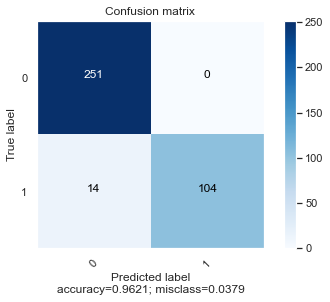

In [39]:
sns.set(style='dark')
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Classification report

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [40]:
# Calculating the precision,recall and F1 Score
import numpy as np

print(classification_report(Y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       251
           1       1.00      0.88      0.94       118

    accuracy                           0.96       369
   macro avg       0.97      0.94      0.95       369
weighted avg       0.96      0.96      0.96       369



AUC Value : 0.9866297521777297


Text(0, 0.5, 'True Positive Rate')

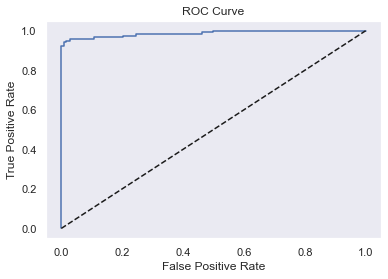

In [41]:
#Plotting the RoC Curve
from sklearn import metrics
fpr,tpr,thre = metrics.roc_curve(Y_test,prob[:,1])
plt.plot(fpr,tpr)

# Calculating the Area Under the Curve (AUC)
AUC = metrics.auc(fpr,tpr)
print('AUC Value :' ,AUC)

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s

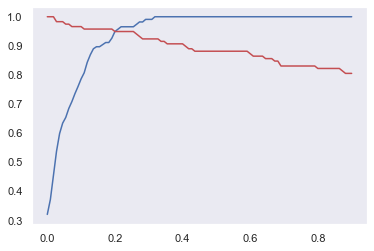

In [42]:
# Calculate & Plot Precesion & Recall
from sklearn import metrics
threshold = np.linspace(0, 0.9, 100)
precesion_list = []
recall_list = []

for i in threshold:
    my_pred = prob[:,1] >= i
    precesion_list.append(metrics.precision_score(Y_test,my_pred))
    recall_list.append(metrics.recall_score(Y_test,my_pred))
plt.plot(threshold,precesion_list)
plt.plot(threshold,recall_list,c='r')

## Apply Deep Neural Network algorithim

Here DNN algorithim is created using Tensorflow and Keras. 

In [43]:
# Loading Dataset
X = result.loc[:,result.columns != 'Class']
Y = result['Class']

In [44]:
#Using normalization in the dataset
import tensorflow as tf
train_set_x = tf.keras.utils.normalize(X, axis = 1)
train_set_x.shape

(1473, 30)

In [45]:
#using tensorflow to build a model using various hidden layers
from tensorflow.keras import models,layers,regularizers
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_dim=30)) #Since we have 30 features we wil get input_dim=30
model.add(layers.Dense(130, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(55, activation='relu', kernel_initializer='uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [46]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001), metrics = ['accuracy'])

In [47]:
#Build a Model
model.fit(train_set_x, Y, epochs = 200, batch_size = 50, verbose=0) #epochs is iteration

In [48]:
#Calculating the accuracy
scores = model.evaluate(train_set_x, Y)
print(model.metrics_names[1], scores[1]*100)

47/47 [==============================] - 0s 614us/step - loss: 0.1982 - accuracy: 0.9389
accuracy 93.89002323150635


In [49]:
#Check weights of the first hidden layer
w,b = model.layers[0].get_weights()
print(w.shape)
b.shape

(30, 200)


(200,)

In [50]:
#Calculate the probabilities and the predictions for the first 5 samples
# prob = model.predict(train_set_x[:5])
dnn_preds = model.predict_classes(X_test_scale)


In [51]:
#Classification Report

from sklearn.metrics import classification_report
pred = model.predict_classes(train_set_x)
print(confusion_matrix(Y,pred))

[[995   5]
 [ 85 388]]


In [52]:
print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1000
           1       0.99      0.82      0.90       473

    accuracy                           0.94      1473
   macro avg       0.95      0.91      0.93      1473
weighted avg       0.94      0.94      0.94      1473



Text(0, 0.5, 'True positive rate')

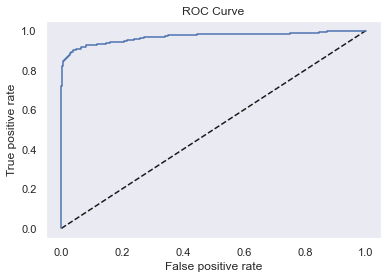

In [53]:
#Plot ROC
from sklearn import metrics
prob = model.predict(train_set_x)

#Plotting the ROC Curve
fpr,tpr,thre = metrics.roc_curve(Y,prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [54]:
#Calculate the area under the curve
print('AUC Value:', metrics.auc(fpr,tpr))

AUC Value: 0.9690338266384777


## Apply Decision Tree algorithim

In [55]:
#Building the model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [56]:
dtree.fit(X_train_scale,Y_train)

DecisionTreeClassifier()

In [57]:
dt_preds = dtree.predict(X_test_scale)

In [58]:
#Classification Report

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,dt_preds))
print(classification_report(Y_test,dt_preds))

[[242   9]
 [ 12 106]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       251
           1       0.92      0.90      0.91       118

    accuracy                           0.94       369
   macro avg       0.94      0.93      0.93       369
weighted avg       0.94      0.94      0.94       369



## Apply Random Forest algorithim

In [59]:
#Building Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scale, Y_train)

RandomForestClassifier()

In [60]:
#Calculate the Train Accuracy
train_score = rfc.score(X_train_scale,Y_train)
print("Train Accuracy: " ,train_score)

#Calculate Test Accuracy
test_score = rfc.score(X_test_scale,Y_test)
print("Test Accuracy: " ,test_score)

Train Accuracy:  1.0
Test Accuracy:  0.9512195121951219


In [61]:
#Preddicting the model

rf_preds = rfc.predict(X_test_scale)


In [62]:
#Classification Report
print(confusion_matrix(Y_test,rf_preds))
print(classification_report(Y_test,rf_preds))

[[250   1]
 [ 17 101]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       251
           1       0.99      0.86      0.92       118

    accuracy                           0.95       369
   macro avg       0.96      0.93      0.94       369
weighted avg       0.95      0.95      0.95       369



0.9902761834019853

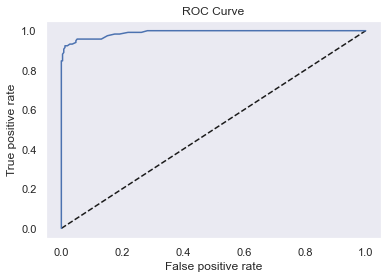

In [63]:
from sklearn import metrics
rf_preds = rfc.predict(X_test_scale)
prob = rfc.predict_proba(X_test_scale)

#Plotting the ROC Curve
fpr,tpr,thre = metrics.roc_curve(Y_test,prob[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

#Area under curve
metrics.auc(fpr,tpr)

## Apply K-Nearest Neighbor Algorithms

In [64]:
# initiate model
knn_model = KNeighborsClassifier()
# fit model on training data
knn_model.fit(X_train_scale, Y_train)
# make predictions
knn_preds = knn_model.predict(X_test_scale)

## Apply Gradient Boosting Algorithms

In [65]:
#initiate model
gb_model = GradientBoostingClassifier()
# fit model on training data
gb_model.fit(X_train_scale, Y_train)
# make predictions
gb_preds = gb_model.predict(X_test_scale)

## Compare Different Models

In [66]:
def  get_performance_scores(model_name_list, 
                            model_prediction_list, 
                            y_true):
    
    """
    Create a list of performance scores
    
    Args:
    model_name_list: a list of model names
    model_prediction_list: a list of model predictions
    y_true: the ground truth labels
    
    """
    
    performance_list = [[] for _ in range(len(model_name_list))]
    
    for i in range(len(model_name_list)):
        model_score_list = []
        
        name = model_name_list[i]
        model_score_list.append(name)
        
        pred = model_prediction_list[i]
        
        accuracy = accuracy_score(y_true, pred)
        model_score_list.append(accuracy)
        
        precision = precision_score(y_true, pred)
        model_score_list.append(precision)
        
        recall = recall_score(y_true, pred)
        model_score_list.append(recall)
        
        f1 = f1_score(y_true, pred)
        model_score_list.append(f1)
        
        auc = roc_auc_score(y_true, pred)
        model_score_list.append(auc)

        performance_list[i].extend(model_score_list)
        
    return performance_list

In [67]:
# Create a list of model names
model_name_list = ['Logistic Regression Model', 'Deep Learning Neural Network',
                   'Decision Tree Model', 'Random Forest Model', 
                   'K-Nearest Neighbor', 'Gradient Boosting Model']

# Create a list of predictions
model_prediction_list = [lr_preds, dnn_preds, dt_preds, rf_preds, knn_preds, gb_preds]

# Get a list of performance scores
model_performance = get_performance_scores(model_name_list,
                                           model_prediction_list,
                                           Y_test)

In [68]:
# Display model_performance list
model_performance

[['Logistic Regression Model',
  0.962059620596206,
  1.0,
  0.8813559322033898,
  0.936936936936937,
  0.9406779661016949],
 ['Deep Learning Neural Network',
  0.9322493224932249,
  1.0,
  0.788135593220339,
  0.8815165876777251,
  0.8940677966101696],
 ['Decision Tree Model',
  0.943089430894309,
  0.9217391304347826,
  0.8983050847457628,
  0.9098712446351932,
  0.9312242555202918],
 ['Random Forest Model',
  0.9512195121951219,
  0.9901960784313726,
  0.8559322033898306,
  0.9181818181818182,
  0.9259740698224053],
 ['K-Nearest Neighbor',
  0.948509485094851,
  0.9805825242718447,
  0.8559322033898306,
  0.914027149321267,
  0.9239820379498953],
 ['Gradient Boosting Model',
  0.959349593495935,
  0.9813084112149533,
  0.8898305084745762,
  0.9333333333333332,
  0.9409311904922681]]

In [69]:
# Create a dataframe with the performance scores
first_model_df = pd.DataFrame(model_performance, columns=['model_name', 'accuracy', 'precision',
                                                          'recall', 'f1', 'auc'])

In [70]:
first_model_df

,model_name,accuracy,precision,recall,f1,auc
0,Logistic Regression Model,0.962060,1.000000,0.881356,0.936937,0.940678
1,Deep Learning Neural Network,0.932249,1.000000,0.788136,0.881517,0.894068
2,Decision Tree Model,0.943089,0.921739,0.898305,0.909871,0.931224
3,Random Forest Model,0.951220,0.990196,0.855932,0.918182,0.925974
4,K-Nearest Neighbor,0.948509,0.980583,0.855932,0.914027,0.923982
5,Gradient Boosting Model,0.959350,0.981308,0.889831,0.933333,0.940931


As per experiements it is concluded that with the help of undersampling techniques with Logistic Regression model performence is very decent. 

Though, Undersampling method we cannot rely completely, So we have to compare our test results with other techniques and take comparison with all the results for final conclusion.

# STEP-4: Other Experiments<a name="section_id4"></a>

## Part I: Hyperparameter Tuning Using GridSearchCV

Using GridSearchCV, we can loop through predefined hyperparameters and fitthe estimator (model) onthe training set. In the end, you can select the best parameters from the listed hyperparameters.

In [71]:
def select_model(train_X, train_y):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ['newton-cg', 'lbfgs', 'liblinear'],
                    "penalty": ['l2'],
                    "C": [10, 1.0, 0.1, 0.01]
                }
        },
        
        {
            "name": "Decision Tree",
            "estimator": DecisionTreeClassifier(random_state=42),
            "hyperparameters":
                {
                    'min_samples_split' : range(3,20,2),
                    'max_depth': range(1,20,2)
                }
        },
        
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=42),
            "hyperparameters":
                {
                    "n_estimators": [100],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
    {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "Gradient Boosting Classifier",
            "estimator": GradientBoostingClassifier(random_state=42),
            "hyperparameters":
                {
                    "learning_rate": [0.01, 0.1, 0.2],
                    "min_samples_split": [2, 3, 5],
                    "min_samples_leaf": [1, 5, 8],
                    "max_depth":[3,5,8],
                    "max_features":["log2","sqrt"],
                    "subsample":[0.6, 0.8],
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='recall',
                            n_jobs=-1,
                            cv=2)
        grid.fit(train_X, train_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}".format(model["best_params"]))
        print("Best Estimator: {}".format(model['best_model']))

    return models

In [72]:
select_model(X_train_scale, Y_train)

LogisticRegression
------------------
Best Score: 0.8732304957785819
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=10, solver='newton-cg')
Decision Tree
-------------
Best Score: 0.887307179584841
Best Parameters: {'max_depth': 13, 'min_samples_split': 13}
Best Estimator: DecisionTreeClassifier(max_depth=13, min_samples_split=13, random_state=42)
RandomForestClassifier
----------------------
Best Score: 0.8676283882435092
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=3,
                       random_state=42)
KNeighborsClassifier
--------------------
Best Score: 0.8591538119723228
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Best Estimator: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, p=1,
        

[{'name': 'LogisticRegression',
  'estimator': LogisticRegression(),
  'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
   'penalty': ['l2'],
   'C': [10, 1.0, 0.1, 0.01]},
  'best_params': {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'},
  'best_score': 0.8732304957785819,
  'best_model': LogisticRegression(C=10, solver='newton-cg')},
 {'name': 'Decision Tree',
  'estimator': DecisionTreeClassifier(random_state=42),
  'hyperparameters': {'min_samples_split': range(3, 20, 2),
   'max_depth': range(1, 20, 2)},
  'best_params': {'max_depth': 13, 'min_samples_split': 13},
  'best_score': 0.887307179584841,
  'best_model': DecisionTreeClassifier(max_depth=13, min_samples_split=13, random_state=42)},
 {'name': 'RandomForestClassifier',
  'estimator': RandomForestClassifier(random_state=42),
  'hyperparameters': {'n_estimators': [100],
   'max_depth': [2, 5, 10],
   'max_features': ['log2', 'sqrt'],
   'min_samples_leaf': [1, 5, 8],
   'min_samples_split': [2, 3, 5]},
  '

### Tuning Deep Learning Neural Network Manually

In [73]:
#using tensorflow to build a model using various hidden layers
from tensorflow.keras import models,layers,regularizers
import tensorflow as tf

tf.random.set_seed(42)
dnn_tuned = models.Sequential()
dnn_tuned.add(layers.Dense(32, activation='relu', input_dim=30)) #Since we have 30 features we wil get input_dim=30
dnn_tuned.add(layers.Dense(64, activation='relu'))
dnn_tuned.add(layers.Dense(1,activation='sigmoid'))
                       
dnn_tuned.compile(loss = 'binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(lr=0.001), 
              metrics = tf.keras.metrics.Recall())  

#Build a Model
history = dnn_tuned.fit(X_train_scale, Y_train, epochs = 50, verbose=0) #epochs is iteration

### Make Predictions with Deep Learning Neural Network Model

In [74]:
dnn_tuned_preds = dnn_tuned.predict(X_test_scale)
dnn_tuned_preds = tf.round(dnn_tuned_preds)
dnn_tuned_preds[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

### Make Predictions with Logistic Regression Model

In [75]:
lr_tuned = LogisticRegression(C=10, solver='newton-cg')
lr_tuned.fit(X_train_scale, Y_train)
lr_tuned_preds = lr_tuned.predict(X_test_scale)                         

### Make Predictions with Decision Tree Model

In [76]:
dt_tuned = DecisionTreeClassifier(max_depth=9, min_samples_split=9, random_state=42)
dt_tuned.fit(X_train_scale, Y_train)
dt_tuned_preds = dt_tuned.predict(X_test_scale)

### Make Predictions with Random Forest Model

In [77]:
rf_tuned = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=2, random_state=42)
rf_tuned.fit(X_train_scale, Y_train)
rf_tuned_preds = rf_tuned.predict(X_test_scale)


### Make Predictions with KNN Model

In [78]:
knn_tuned = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, p=1, weights='distance')
knn_tuned.fit(X_train_scale, Y_train)
knn_tuned_preds = knn_tuned.predict(X_test_scale)

### Make Predictions with Gradient Boosting Model

In [79]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.2, max_features='log2',
                                      min_samples_leaf=5, random_state=42, 
                                      subsample=0.8)
gb_tuned.fit(X_train_scale, Y_train)
gb_tuned_preds = gb_tuned.predict(X_test_scale)

### Create a List of Performance Scores

In [80]:
model_name_list = ['Logistic Regression Model', 'Deep Learning Neural Network',
                   'Decision Tree Model', 'Random Forest Model', 
                   'K-Nearest Neighbor', 'Gradient Boosting Model']

model_prediction_list = [lr_tuned_preds, dnn_tuned_preds, 
                         dt_tuned_preds, rf_tuned_preds, 
                         knn_tuned_preds, gb_tuned_preds]

gridsearch_performance = get_performance_scores(model_name_list,
                                                model_prediction_list,
                                                Y_test)

In [81]:
gridsearch_df = pd.DataFrame(gridsearch_performance, columns=['model_name', 'accuracy', 'precision',
                                                              'recall', 'f1', 'auc'])

gridsearch_df

,model_name,accuracy,precision,recall,f1,auc
0,Logistic Regression Model,0.964770,1.000000,0.889831,0.941704,0.944915
1,Deep Learning Neural Network,0.972900,0.982143,0.932203,0.956522,0.962118
2,Decision Tree Model,0.937669,0.905983,0.898305,0.902128,0.927240
3,Random Forest Model,0.953930,1.000000,0.855932,0.922374,0.927966
4,K-Nearest Neighbor,0.943089,0.921739,0.898305,0.909871,0.931224
5,Gradient Boosting Model,0.953930,0.990291,0.864407,0.923077,0.930211


## Part II: Engineer New Features

In the following section, we will be generating new features. We will first plot the feature importances obtained from gradient boosting model's feature_importances_ attribute.

We will then create new feature by adding, substracting, multiplying and dividing one varaible with another. 

In [82]:
def plot_importance(model, features, num = 10):
    
    """Make a barplot of important features based on feature importance scores"""
    
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':features.columns})
    plt.figure(figsize=(35, 15))
    sns.set(font_scale = 3)
    splot = sns.barplot(x="Feature", y="Value", 
                        palette = 'terrain',
                        data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    
    plt.title('Feature Importance')
    plt.xticks(rotation=45)

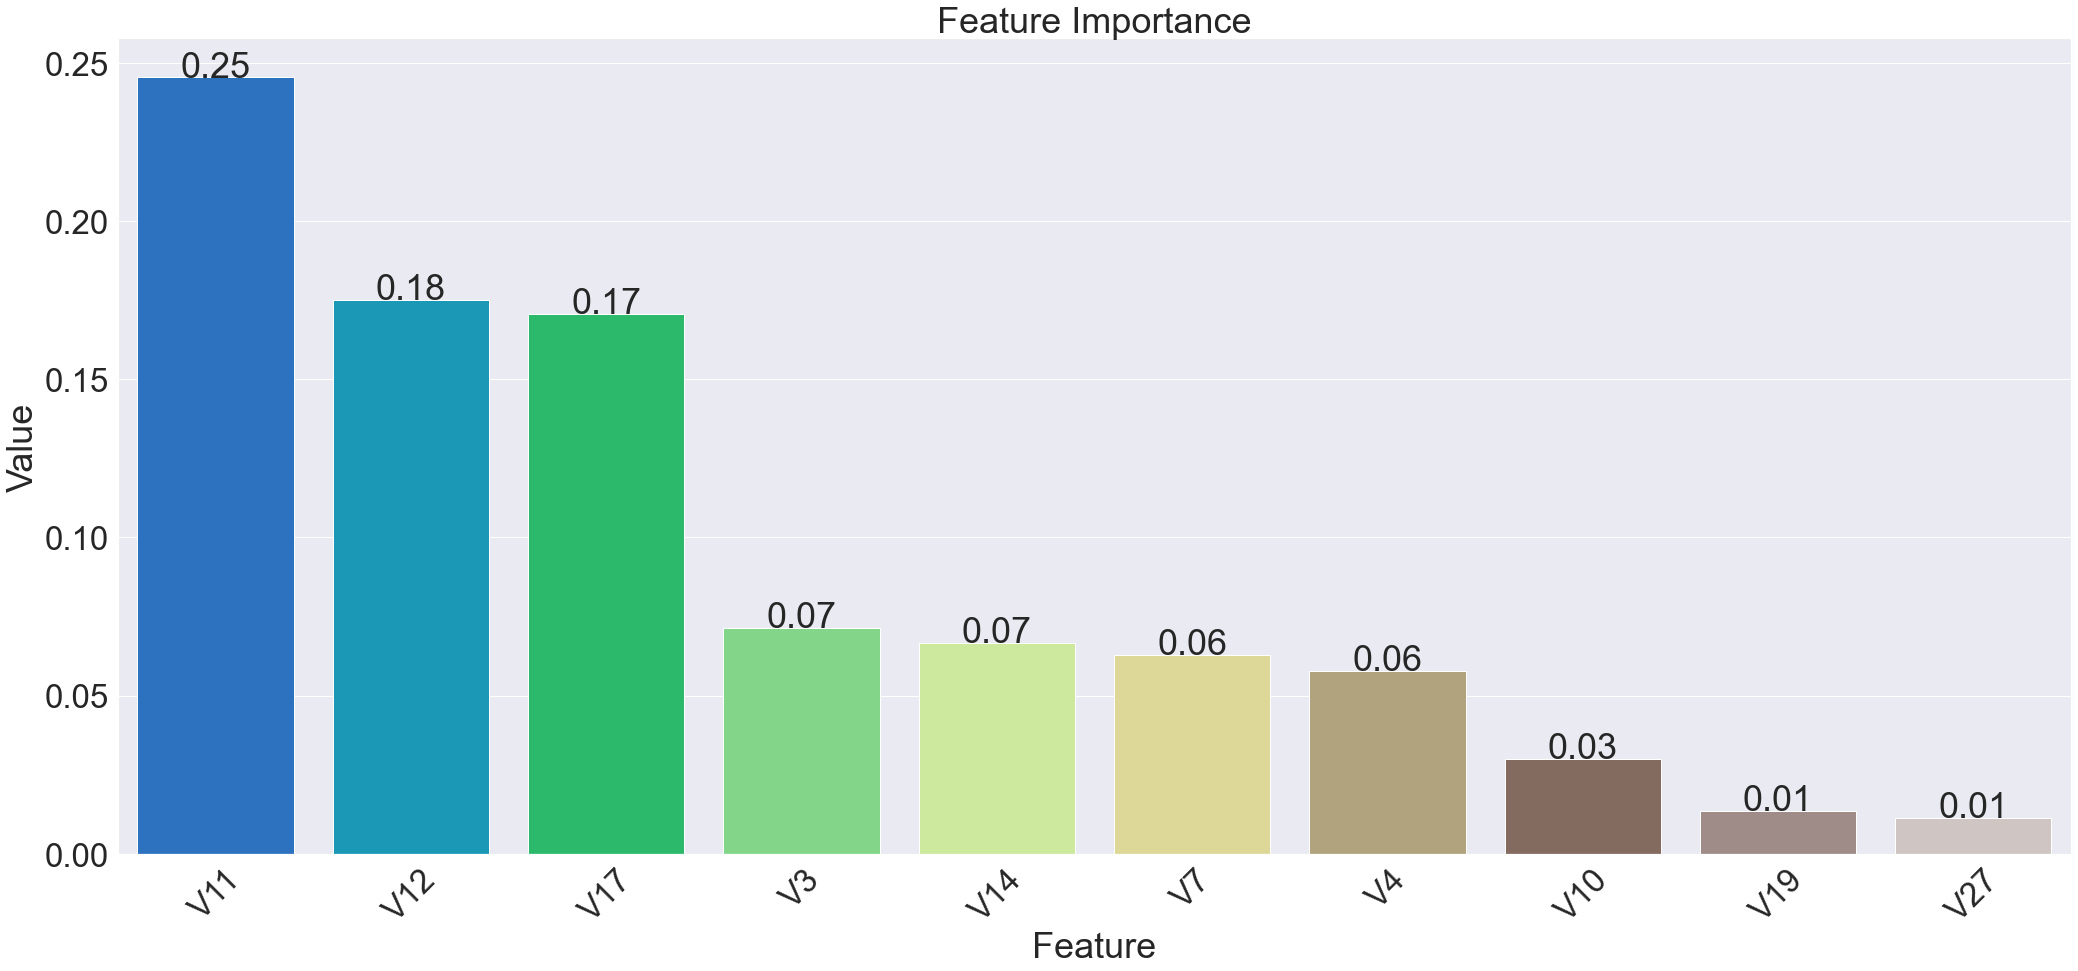

In [83]:
# plot feature importance
plot_importance(gb_tuned, X_train, num = 10)

In [84]:
# create new feature by adding, substracting, multiplying and dividing one varaible with another
result['11_12_sum'] = result['V11'] + result['V12']
result['11_12_sub'] = result['V11'] - result['V12']
result['11_12_product'] = result['V11'] * result['V12']
result['11_12_quotient'] = (result['V11'] + 1)/(result['V12']+1)

In [85]:
# create new feature by adding, substracting, multiplying and dividing one varaible with another
result['11_17_sum'] = result['V11'] + result['V17']
result['11_17_sub'] = result['V11'] - result['V17']
result['11_17_product'] = result['V11'] * result['V17']
result['11_17_quotient'] = (result['V11'] + 1)/(result['V17']+1)

In [86]:
# scale the data
scalar = StandardScaler()
X = result.loc[:,result.columns != 'Class']
Y = result['Class']

# create training set and testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 45)
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.transform(X_test)

In [87]:
# use tuned logistic regression model on the new dataset
lr_tuned.fit(X_train_scale, Y_train)
lr_feat_preds = lr_tuned.predict(X_test_scale)  

In [88]:
# use tuned decision tree model on the new dataset
dt_tuned.fit(X_train_scale, Y_train)
dt_feat_preds = dt_tuned.predict(X_test_scale)

In [89]:
# use tuned deep learning model on the new dataset

from tensorflow.keras import models,layers,regularizers
import tensorflow as tf

tf.random.set_seed(42)
dnn_tuned = models.Sequential()
dnn_tuned.add(layers.Dense(32, activation='relu', input_dim=38)) #Since we have 34 features we wil get input_dim=30
dnn_tuned.add(layers.Dense(64, activation='relu'))
dnn_tuned.add(layers.Dense(1,activation='sigmoid'))
                       
dnn_tuned.compile(loss = 'binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(lr=0.001), 
              metrics = tf.keras.metrics.Recall())  

#Build a Model
history = dnn_tuned.fit(X_train_scale, Y_train, epochs = 50, verbose=0) #epochs is iteration

In [90]:
dnn_tuned.fit(X_train_scale, Y_train)
dnn_feat_preds = dnn_tuned.predict(X_test_scale)
dnn_feat_preds = tf.round(dnn_tuned_preds)

35/35 [==============================] - 0s 2ms/step - loss: 0.0226 - recall_1: 0.9775


In [91]:
# use tuned random forest model on the new dataset

rf_tuned.fit(X_train_scale, Y_train)
rf_feat_preds = rf_tuned.predict(X_test_scale)

In [92]:
# use tuned KNN model on the new dataset

knn_tuned.fit(X_train_scale, Y_train)
knn_feat_preds = knn_tuned.predict(X_test_scale)

In [93]:
# use tuned gradient boosting model on the new dataset

gb_tuned.fit(X_train_scale, Y_train)
gb_feat_preds = gb_tuned.predict(X_test_scale)

In [94]:
model_name_list = ['Logistic Regression Model', 'Deep Learning Neural Network',
                   'Decision Tree Model', 'Random Forest Model', 
                   'K-Nearest Neighbor', 'Gradient Boosting Model']

model_prediction_list = [lr_feat_preds, dnn_feat_preds, 
                         dt_feat_preds, rf_feat_preds, 
                         knn_feat_preds, gb_feat_preds]

feat_eng_performance = get_performance_scores(model_name_list,
                                              model_prediction_list,
                                              Y_test)

In [95]:
# Create dataframe to compare all models
feat_engineered_df = pd.DataFrame(feat_eng_performance, columns=['model_name', 'accuracy', 'precision',
                                                                 'recall', 'f1', 'auc'])

In [96]:
feat_engineered_df

,model_name,accuracy,precision,recall,f1,auc
0,Logistic Regression Model,0.967480,1.000000,0.898305,0.946429,0.949153
1,Deep Learning Neural Network,0.972900,0.982143,0.932203,0.956522,0.962118
2,Decision Tree Model,0.934959,0.891667,0.906780,0.899160,0.927493
3,Random Forest Model,0.951220,1.000000,0.847458,0.917431,0.923729
4,K-Nearest Neighbor,0.937669,0.913043,0.889831,0.901288,0.924995
5,Gradient Boosting Model,0.962060,1.000000,0.881356,0.936937,0.940678


# STEP-5: Conclusion<a name="section_id5"></a>

In [97]:
model_name_list = ['Logistic Regression', 'Logistic Regression - GridSearchCV', 'Logistic Regression - New Features',
                   'DNN','DNN - GridSearchCV', 'DNN - New Features',
                   'Decision Tree', 'Decision Tree - GridSearchCV', 'Decision Tree - New Features',
                   'Random Forest', 'Random Forest - GridSearchCV', 'Random Forest - New Features',
                   'KNN', 'KNN - GridSearchCV', 'KNN - New Features',
                   'Gradient Boosting', 'Gradient Boosting - GridSearchCV', 'Gradient Boosting - New Features'
                  ]

model_prediction_list = [lr_preds, lr_tuned_preds, lr_feat_preds, 
                         dnn_preds, dnn_tuned_preds, dnn_feat_preds,
                         dt_preds, dt_tuned_preds, dt_feat_preds,
                         rf_preds, rf_tuned_preds, rf_feat_preds, 
                         knn_preds, knn_tuned_preds, knn_feat_preds, 
                         gb_preds, gb_tuned_preds, gb_feat_preds]

all_performance = get_performance_scores(model_name_list,
                                         model_prediction_list,
                                         Y_test)

In [98]:
compare_all_df = pd.DataFrame(all_performance, 
                              columns=['model_name', 
                                       'accuracy', 
                                       'precision',
                                       'recall', 
                                       'f1', 
                                       'auc'])

In [99]:
compare_all_df

,model_name,accuracy,precision,recall,f1,auc
0,Logistic Regression,0.962060,1.000000,0.881356,0.936937,0.940678
1,Logistic Regression - GridSearchCV,0.964770,1.000000,0.889831,0.941704,0.944915
2,Logistic Regression - New Features,0.967480,1.000000,0.898305,0.946429,0.949153
3,DNN,0.932249,1.000000,0.788136,0.881517,0.894068
4,DNN - GridSearchCV,0.972900,0.982143,0.932203,0.956522,0.962118
5,DNN - New Features,0.972900,0.982143,0.932203,0.956522,0.962118
6,Decision Tree,0.943089,0.921739,0.898305,0.909871,0.931224
7,Decision Tree - GridSearchCV,0.937669,0.905983,0.898305,0.902128,0.927240
8,Decision Tree - New Features,0.934959,0.891667,0.906780,0.899160,0.927493
9,Random Forest,0.951220,0.990196,0.855932,0.918182,0.925974


## Conclusion:

### Dealing with Imbalanced Dataset

The original dataset was highly imbalanced. We have way more normal transactions than fraudulent ransactons. When one set of classes dominate over another set of classes, it causes the machine learning model to be more biased towards majority class which results in poor classification of minority classes.

There are various approaches to deal with this problem. 

For example:

**Undersampling methods**

**Oversampling methods**

**Synthetic data generation**

In this project, we have used the undersampling method. After downsampling, we ended up with:   
Total Fraudulent Transactions:  473   
Total Non-Fraudulent Transactions:  1000   

### Model Development:

**During the first round of experiment**, we have used all the default hyperparmeters values for our machine learning algrorithms (Except Deep Learning Neural Network). In this round, decision tree has achieved the highest recall score of 0.89.

**During the second round of experiment**, we have tuned all the hyperaparmeters using GridSearchCV. 

Why GridSearchCV? Using GridSearchCV, we can loop through predefined hyperparameters and fitthe estimator (model) onthe training set. In the end, we can select the best parameters from the listed hyperparameters.

Using GridSearchCV, we were able to find improve the recall score of KNN from 0.81 to 0.89. The hyperparameter tuning was also able to improve the recall score for: Decision Tree, Random Forest.


As far as performance goes, Deep Learning Neural Network has the highest recall score.

**During the third round of experiment**, We created new features by adding, substracting, multiplying and dividing one varaible with another. After applying the tuned models on the dataset with new features, we were able to improve the performance of Logisic Regression from 0.87 to 0.89. However, this method doesn't seem to have affected the performance of other models.

### Project Limitation and Future Improvement:

1. To protect the privacy of the customer, the dataset has gone through PCA. In real world business settings, we will have access to unmasked data, so that we can understand better what the varaibles represents. With real datatset, we can also discover more patterns and are able to engineer better features.

2. If time is not an issue, we can always change the hyperparameter settings, and test more hyperparameters - so we might discover a different combinations that generator higher performance.

### Deployment:

Since DNN has the highest recall score of 0.92. I'd recommend deploying this model to production.

However, it is a very special time worldwide right now. Due to Covid, more and more people tend to purchase online. That means the distribution of online transactions might have changed. What used to be triggered as fraudulent activity might be deemed as completed normal. Therefore,since people's purchasing behaviors have changed, we need to obtain new data and train the model so that it can make accurate predictions.
